This is the script linking to the data in **Figure 1** for intensity of keratin <br>
Analysed in fiji by masking the embryo to measure Mean intensity in time plotted for 4+6 hrs pf

# Note from Jan 2024: redo of Figure 1 to save datasheets and verfiy that the data used is complete. 

## Things to do 16/01/2024 <br>
- [ ] check if all data is binned and stored in the plotting folder<br>
- [ ] Add a note in the plotting folder to save the folders in each data file and where to find the code for the data plot<br>

In [2]:
#the data files are in the following folders
folder1="H:/PHD_data/Imaging_et_analysis/Sp8Imaging/2021/02_Feb/23022021/KrtHist/KeratinIntensity/"
folder2="H:/PHD_data/Imaging_et_analysis/Sp8Imaging/2021/04-Apr/08042021_celltrackCnt/KeratinIntensity/"
saveFolder="H:/PHD_data/Imaging_et_analysis/Sp8Imaging/Figure1/IntensityGraphBinned/"

In [3]:
#import required libraries
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import os
from glob import glob
import pandas as pd
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D
from re import findall as find
import re
from datetime import datetime
today=datetime.today().strftime('%Y%m%d')


In [3]:
print(f"This was run on {today} and figures will be saved in {saveFolder}")

This was run on 20240719 and figures will be saved in H:\PHD_data\Imaging_et_analysis\Sp8Imaging\Figure1\IntensityGraphBinned\


In [3]:
Intensityfiles=glob(folder1+"*.csv")
Intensityfiles=Intensityfiles+glob(folder2+"*.csv")
print("There are {} emrbyos in the figure".format(len(Intensityfiles)))

There are 6 emrbyos in the figure


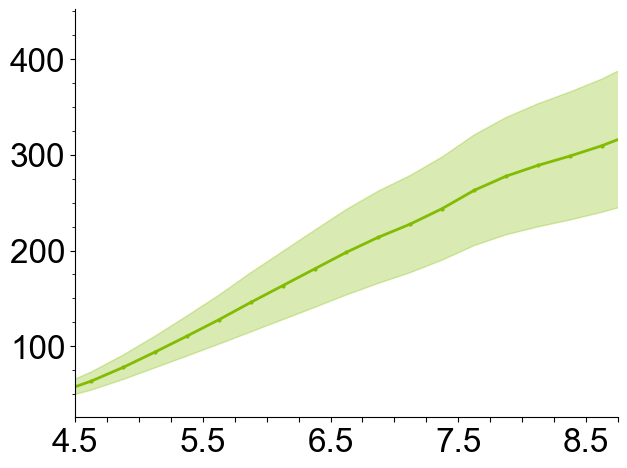

In [7]:
class BinnedIntensityPlotter:
    def __init__(self, intensity_files, bin_edges, save_folder):
        self.intensity_files = intensity_files
        self.bin_edges = bin_edges
        self.save_folder = save_folder
        self.intensity_data = pd.DataFrame()
        self.binned_intensity_data = pd.DataFrame()

    def process_data(self):
        bin_centers = 0.5 * (self.bin_edges[1:] + self.bin_edges[:-1])
        self.binned_intensity_data["Time (hpf)"] = bin_centers
        bin_averages = np.zeros(len(bin_centers))

        for file in self.intensity_files:
            if file.find("0804") == -1:
                data = pd.read_csv(file)
                data["Label"] = "23022021" + file.split("Pos")[1][0:3]
                data["Time"] = [(x - 1) * 15.5 / 60 + 4 for x in data[" "]]
                self.intensity_data = pd.concat([self.intensity_data, data])
                for i in range(len(bin_centers)):
                    bin_averages[i] = np.mean(data["Mean"][(data["Time"] > self.bin_edges[i]) & (data["Time"] < self.bin_edges[i + 1])])
                self.binned_intensity_data["23022021_" + file.split("Pos")[1][0:3]] = bin_averages

            else:
                data = pd.read_csv(file)
                data["Time"] = [(x - 1) * 5.2 / 60 + 4 for x in data[" "]]
                self.intensity_data = pd.concat([self.intensity_data, data])
                for i in range(len(bin_centers)):
                    bin_averages[i] = np.mean(data["Mean"][(data["Time"] > self.bin_edges[i]) & (data["Time"] < self.bin_edges[i + 1])])
                self.binned_intensity_data["08042021_" + file.split("Pos")[1][0:3]] = bin_averages
        self.binned_intensity_data.to_csv(self.save_folder +today+ "_Fig1D_BinnedIntensityData.csv", index=False)

    def plot_data(self):
        fig, ax = plt.subplots(figsize=(7, 5.3))
        plt.rcParams['figure.dpi'] = 100
        plt.rcParams['font.size'] = 24
        plt.rcParams['savefig.dpi'] = 300
        plt.rcParams['font.family'] = 'sans-serif'
        plt.rcParams['font.sans-serif'] = 'Arial'
        plt.gca().spines['right'].set_color('none')
        plt.gca().spines['top'].set_color('none')
        ax.set_xlim(4.5, 8.5)
        ax.set_xticks(np.arange(4.5, 9, 0.25))
        ax.set_xticklabels(["4.5", "", "", "", "5.5", "", "", "", "6.5", "", "", "", "7.5", "", "", "", "8.5", ""])
        ax.set_yticks(np.arange(0, 470, 25), minor=True)
        ax.plot(self.binned_intensity_data["Time (hpf)"], self.binned_intensity_data.iloc[:, 1:5].mean(axis=1), color="#83bb03", linewidth=2)
        ax.scatter(self.binned_intensity_data["Time (hpf)"], self.binned_intensity_data.iloc[:, 1:5].mean(axis=1), color="#83bb03", s=4)
        ax.fill_between(self.binned_intensity_data["Time (hpf)"], self.binned_intensity_data.iloc[:, 1:5].mean(axis=1) - self.binned_intensity_data.iloc[:, 1:5].sem(axis=1), self.binned_intensity_data.iloc[:, 1:5].mean(axis=1) + self.binned_intensity_data.iloc[:, 1:5].sem(axis=1), color="#83bb03", alpha=0.3)
        plt.savefig(self.save_folder +today+ "_Figure1D_KeratinIntensity_nolab.png", dpi=300, bbox_inches='tight', transparent=True)
        plt.savefig(self.save_folder +today+ "_Figure1D_KeratinIntensity_nolab.pdf", dpi=300, bbox_inches='tight', transparent=True)
        plt.savefig(self.save_folder +today+ "Figure1D_KeratinIntensity_nolab.svg", dpi=300, bbox_inches='tight', transparent=True)        
        plt.show()


# Usage example:
intensity_files = glob(folder1 + "*.csv") + glob(folder2 + "*.csv")
bin_edges = np.arange(4, 10, 0.25)
save_folder = "H:/PHD_data/Imaging_et_analysis/PaperFigures/Figure1/IntensityGraphBinned/"

plotter = BinnedIntensityPlotter(intensity_files, bin_edges, save_folder)
plotter.process_data()
plotter.plot_data()


Older test code ignore and use the class function created before

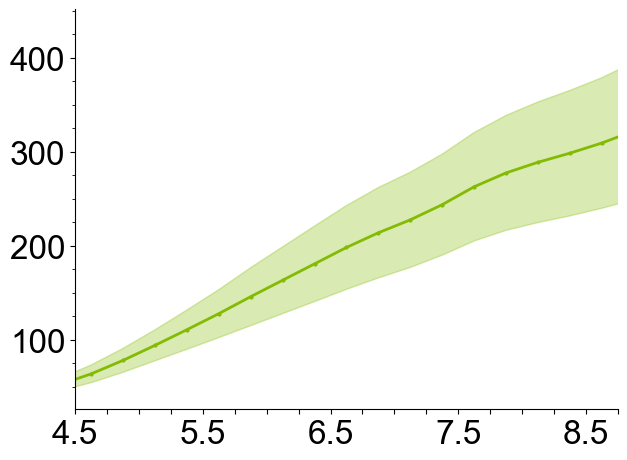

In [22]:
intensityData=pd.DataFrame()
binnedIntensityData=pd.DataFrame()
bin_edges= np.arange(4,10,0.25)
# Compute the bin averages
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])
binnedIntensityData["Time (hpf)"]=bin_centers
bin_averages = np.zeros(len(bin_centers))
for file in Intensityfiles:
    if file.find("0804")==-1:
        data = pd.read_csv(file)
        data["Label"]="23022021"+file.split("Pos")[1][0:3]
        data["Time"]=[(x-1)*15.5/60+4 for x in data[" "]]
        intensityData = pd.concat([intensityData,data])
        for i in range(len(bin_centers)):
            bin_averages[i] = np.mean(data["Mean"][(data["Time"]>bin_edges[i]) & (data["Time"]<bin_edges[i+1])])
        binnedIntensityData["23022021_"+file.split("Pos")[1][0:3]]=bin_averages
    
    else:
        data = pd.read_csv(file)
        
        data["Time"]=[(x-1)*5.2/60+4 for x in data[" "]]
        intensityData = pd.concat([intensityData,data])
        for i in range(len(bin_centers)):
            bin_averages[i] = np.mean(data["Mean"][(data["Time"]>bin_edges[i]) & (data["Time"]<bin_edges[i+1])])
        binnedIntensityData["08042021_"+file.split("Pos")[1][0:3]]=bin_averages
binnedIntensityData.to_csv(saveFolder+"Figure1D_binnedIntensityData.csv")
#plot the average of columns 1: data in binnedIntensityData dataframe as a line plot with error bars as a ribbon around the line
fig, ax = plt.subplots(figsize=(7, 5.3))
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower
plt.rcParams['font.size'] = 24
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
#ax.set_xlabel("Time (hpf)")
#ax.set_ylabel("Keratin Intensity (A.U.)")
ax.set_xlim(4.5,8.5)
ax.set_xticks(np.arange(4.5,9,0.25))
ax.set_xticklabels(["4.5","","","","5.5","","","","6.5","","","","7.5","","","","8.5",""])
ax.set_yticks(np.arange(0,470,25),minor=True)
ax.plot(binnedIntensityData["Time (hpf)"],binnedIntensityData.iloc[:,1:5].mean(axis=1),color="#83bb03",linewidth=2)
ax.scatter(binnedIntensityData["Time (hpf)"],binnedIntensityData.iloc[:,1:5].mean(axis=1),color="#83bb03",s=4)
ax.fill_between(binnedIntensityData["Time (hpf)"],binnedIntensityData.iloc[:,1:5].mean(axis=1)-binnedIntensityData.iloc[:,1:5].sem(axis=1),binnedIntensityData.iloc[:,1:5].mean(axis=1)+binnedIntensityData.iloc[:,1:5].sem(axis=1),color="#83bb03",alpha=0.3)
plt.savefig(saveFolder+"Figure1D_KeratinIntensity_nolab.png",dpi=300,bbox_inches='tight',transparent=True)
plt.savefig(saveFolder+"Figure1D_KeratinIntensity_nolab.pdf",dpi=300,bbox_inches='tight',transparent=True)
plt.savefig(saveFolder+"Figure1D_KeratinIntensity_nolab.svg",dpi=300,bbox_inches='tight',transparent=True)
plt.show()

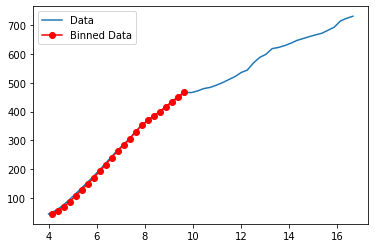

In [10]:
data=pd.read_csv(Intensityfiles[0])
data["Time"]=[(x-1)*15.5/60+4 for x in data[" "]]
bin_edges= np.arange(4,10,0.25)
# Compute the bin averages
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])
bin_averages = np.zeros(len(bin_centers))
for i in range(len(bin_centers)):
    mask = (data["Time"] >= bin_edges[i]) & (data["Time"] < bin_edges[i+1])
    bin_averages[i] = np.mean(data["Mean"][mask])
# Plot the line plot
plt.plot(data["Time"], data["Mean"], label='Data')
plt.plot(bin_centers, bin_averages, 'ro-', label='Binned Data')
plt.legend()
plt.show()

In [23]:
for file in Intensityfiles:
    print(file)

H:\PHD_data\Imaging_et_analysis\Sp8Imaging\2021\02_Feb\23022021\KrtHist\KeratinIntensity\Results_Mean_Pos001.csv
H:\PHD_data\Imaging_et_analysis\Sp8Imaging\2021\02_Feb\23022021\KrtHist\KeratinIntensity\Results_Mean_Pos002.csv
H:\PHD_data\Imaging_et_analysis\Sp8Imaging\2021\02_Feb\23022021\KrtHist\KeratinIntensity\Results_Mean_Pos003.csv
H:\PHD_data\Imaging_et_analysis\Sp8Imaging\2021\02_Feb\23022021\KrtHist\KeratinIntensity\Results_Mean_Pos004.csv
H:\PHD_data\Imaging_et_analysis\Sp8Imaging\2021\04-Apr\08042021_celltrackCnt\KeratinIntensity\Results_Pos001_0804.csv
H:\PHD_data\Imaging_et_analysis\Sp8Imaging\2021\04-Apr\08042021_celltrackCnt\KeratinIntensity\Results_Pos002_0804.csv


### Figure 1E Area plot
Plotted with binning at 15 mins interval
Data saved in figure folder:
H:\PHD_data\Imaging_et_analysis\PaperFigures\Figure1

16042024: New plot with sp8 data


In [158]:
areafolder1="H:/PHD_data/Imaging_et_analysis/Sp8Imaging/2021/04-Apr/08042021_celltrackCnt/Pos001/AreaAnalysisFIgure1/"
areafolder2="H:/PHD_data/Imaging_et_analysis/Sp8Imaging/2021/04-Apr/08042021_celltrackCnt/Pos002/AreaAnalysisFIgure1/"
areafolder3="H:/PHD_data/Imaging_et_analysis/Sp8Imaging/2021/02_Feb/11022021_keratinbeadSeg/UtrN2V/Pos001_MaxStack/AreaAnalysisFigure1/"
areafolder4="H:/PHD_data/Imaging_et_analysis/Sp8Imaging/2021/02_Feb/11022021_keratinbeadSeg/UtrN2V/Pos002_MaxStack/AreaAnalysisFigure1/"
areafolder5="H:/PHD_data/Imaging_et_analysis/Sp8Imaging/2021/02_Feb/11022021_keratinbeadSeg/UtrN2V/Pos003_MaxStack/AreaAnalysisFigure1/"
areafolders=[areafolder3,areafolder4,areafolder5]
# for folder in areafolders:
#     for file in glob(folder+"*.csv"):
#         print(file)
#         data=pd.read_csv(file)
#         print(data.head())
#         break

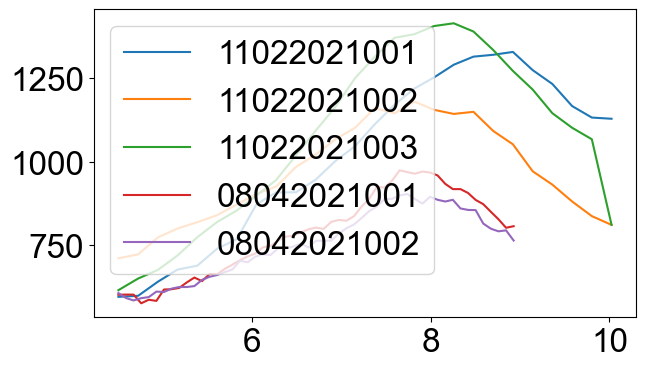

In [159]:
areapd=pd.DataFrame(columns=["Time (hpf)","Area","Label"])
binnedAreaData=pd.DataFrame()
timebins=np.arange(4.5,9,0.25)
today=datetime.today().strftime('%Y%m%d')
for folder in areafolders:
    if folder in [areafolder1,areafolder2]:
        time=306.50/60
        lab1="08042021"
    else:
        time=795.43/60
        lab1="11022021"

    for iter,file in enumerate(glob(folder+"*.csv")):
        data=pd.read_csv(file)
        data["Label"]=file.split("Pos")[1][0:3]
        areapd.loc[iter,"Area"]=data["Area"].mean()
        areapd.loc[iter,"Time (hpf)"]=(iter)*time/60+4.5
        areapd.loc[iter,"Label"]=lab1+file.split("Pos")[1][0:3]
        areapd.to_csv(folder+"AreaData.tsv",index=False)
    plt.plot(areapd["Time (hpf)"],areapd["Area"],label=lab1+file.split("Pos")[1][0:3])

    bin_averages = np.zeros(len(timebins)-1)
    binnedAreaData["Time (hpf)"]=timebins[:-1]
    for i in range(len(timebins)-1):
        bin_averages[i] = np.mean(areapd["Area"][(areapd["Time (hpf)"]>timebins[i]) & (areapd["Time (hpf)"]<timebins[i+1])])
    binnedAreaData[lab1+"_"+file.split("Pos")[1][0:3]]=bin_averages
for folder in [areafolder1,areafolder2]:
    time=306.50/60
    lab1="08042021"
    for iter,file in enumerate(glob(folder+"*.csv")):
        data=pd.read_csv(file)
        data["Label"]=file.split("Pos")[1][0:3]
        areapd.loc[iter,"Area"]=data["Area"].mean()
        areapd.loc[iter,"Time (hpf)"]=(iter)*time/60+4.5
        areapd.loc[iter,"Label"]=lab1+file.split("Pos")[1][0:3]
        areapd.to_csv(folder+"AreaData.tsv",index=False)
    plt.plot(areapd["Time (hpf)"],areapd["Area"],label=lab1+file.split("Pos")[1][0:3])
    plt.legend(loc="upper left")

    bin_averages = np.zeros(len(timebins)-1)
    binnedAreaData["Time (hpf)"]=timebins[:-1]
    for i in range(len(timebins)-1):
        bin_averages[i] = np.mean(areapd["Area"][(areapd["Time (hpf)"]>timebins[i]) & (areapd["Time (hpf)"]<timebins[i+1])])
    binnedAreaData[lab1+"_"+file.split("Pos")[1][0:3]]=bin_averages
    
binnedAreaData.to_csv(f"H:/PHD_data/Imaging_et_analysis/PaperFigures/Figure1/AreaGraphBinned/AreaData_{today}.csv")



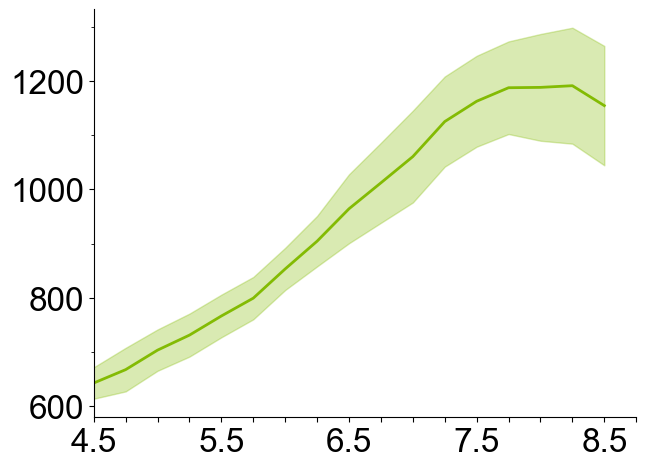

In [161]:
plt.figure(figsize=(7,5.3))
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower
plt.rcParams['font.size'] = 24
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
plt.xlim(4.5,8.5)
plt.xticks(np.arange(4.5,9,0.25))
plt.xticks(np.arange(4.5,9,0.25),["4.5","","","","5.5","","","","6.5","","","","7.5","","","","8.5",""])
plt.yticks(np.arange(0,1400,100),minor=True)

plt.plot(binnedAreaData["Time (hpf)"],binnedAreaData.iloc[:,1:5].mean(axis=1),color="#83bb03",linewidth=2)
#plt.scatter(binnedAreaData["Time (hpf)"],binnedAreaData.iloc[:,1:5].mean(axis=1),color="#83bb03",s=4)
plt.fill_between(binnedAreaData["Time (hpf)"],binnedAreaData.iloc[:,1:5].mean(axis=1)-binnedAreaData.iloc[:,1:5].sem(axis=1),binnedAreaData.iloc[:,1:5].mean(axis=1)+binnedAreaData.iloc[:,1:5].sem(axis=1),color="#83bb03",alpha=0.3)
plt.savefig(f"H:/PHD_data/Imaging_et_analysis/PaperFigures/Figure1/AreaGraphBinned/AreaGraph_{today}.png",dpi=300,bbox_inches='tight',transparent=True)
plt.savefig(f"H:/PHD_data/Imaging_et_analysis/PaperFigures/Figure1/AreaGraphBinned/AreaGraph_{today}.pdf",dpi=300,bbox_inches='tight',transparent=True)
plt.savefig(f"H:/PHD_data/Imaging_et_analysis/PaperFigures/Figure1/AreaGraphBinned/AreaGraph_{today}.svg",dpi=300,bbox_inches='tight',transparent=True)
plt.show()

In [3]:
foldera1="H:\\PHD_data\\Imaging_et_analysis\\Sp8Imaging\\2021\\02_Feb\\11022021_keratinbeadSeg\\UtrN2V\\*\\AreaAnalysisFigure1\\"
foldera2="H:\\PHD_data\\Imaging_et_analysis\\Sp8Imaging\\2021\\04-Apr\\08042021_celltrackCnt\\Pos00*\\AreaAnalysisFIgure1\\"
AreaFiles=glob(foldera1+"*.csv")
AreaFiles=AreaFiles+glob(foldera2+"*.csv")
savefolder="H:\\PHD_data\\Imaging_et_analysis\\PaperFigures\\Figure1\\AreaGraphBinned\\"
if not os.path.exists(savefolder):
    os.makedirs(savefolder)

In [46]:
file=AreaFiles[0]
file2=AreaFiles[-1]
date=file.split("\\")[6].split("_")[0]
#filename=date+file.split("\\")[7].split("_")[1].split("Pos")[1][0:3]

file[file.find("Pos")+3:file.find("Pos")+6]
file[file.find("Results"):].find("")
re.findall(r'\d{8}+', file2)[0]

'08042021'

In [4]:
Areadatframe=pd.DataFrame()

binnedAreaData=pd.DataFrame()
bina_edges= np.arange(4,10,0.25)
# Compute the bin averages
bina_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])
binnedAreaData["Time (hpf)"]=bin_centers
bin_averages = np.zeros(len(bin_centers))

for file in AreaFiles:
    phrase1 = re.findall(r'\d{8}+', file)[0]
    phrase2 = file[file.find("Pos"):file.find("Pos")+6]
    label=re.findall(r'\d{8}+', file)[0]+"_"+file[file.find("Pos"):file.find("Pos")+6]
    print("Processing file: "+label)
    filteredAreaFiles = list(filter(lambda x: phrase1 in x and phrase2 in x, AreaFiles))
    for filteredFile in filteredAreaFiles:    
        data=pd.read_csv()
    Area.append(data["Area"].mean())
    
    time=int(file[file.find(".csv")-2:file.find(".csv")])
    # define the phrases to search for
    phrase1 = re.findall(r'\d{8}+', file)[0]
    phrase2 = file[file.find("Pos"):file.find("Pos")+6]
    filteredAreaFiles = list(filter(lambda x: phrase1 in x and phrase2 in x, AreaFiles))
    Areadatframe["Time_"+label]=np.zeros(len(filteredAreaFiles))
    if file.find("11022021")>-1:
        Time.append((time-1)*795.43/60/60+4)
        Areadatframe["Time_"+label].append(time)
    elif file.find("08042021")>-1:
        Time.append((time-1)*5.2/60+4)
        Areadatframe["Time_"+label].append(time)
    Areadatframe["AreaMean_"+label]=Area
Areadatframe

NameError: name 'bin_edges' is not defined

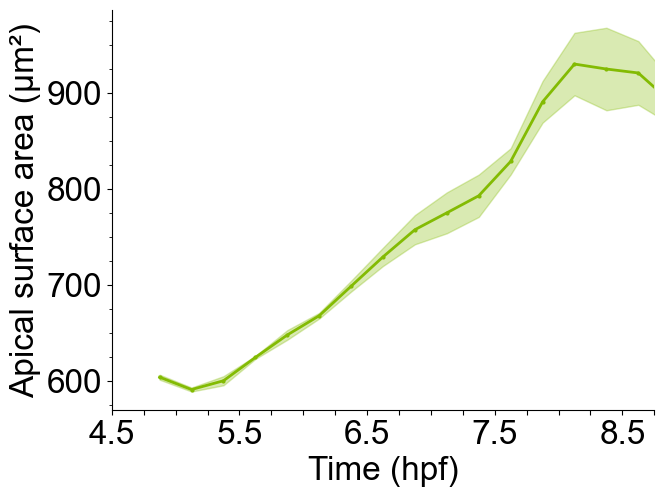

In [10]:
bina_edges= np.arange(4,10,0.25)
# Compute the bin averages
bin_centers = 0.5 * (bina_edges[1:] + bina_edges[:-1])
binnedAreaData["Time (hpf)"]=bin_centers
bin_averages = np.zeros(len(bin_centers))
areacols=[col for col in AFrame.columns if 'AreaMean' in col]
for col in areacols:
    for  i in range(len(bin_centers)):
        bin_averages[i] = np.mean(AFrame[col][(AFrame["Time"+col[8:]]>bina_edges[i]) & (AFrame["Time"+col[8:]]<bina_edges[i+1])])
    binnedAreaData[col]=bin_averages
binnedAreaData.to_csv(savefolder+"Figure1D_binnedAreaData.csv")
#plot the average of columns 1: data in binnedIntensityData dataframe as a line plot with error bars as a ribbon around the line
fig, ax = plt.subplots(figsize=(7, 5.3))
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower
plt.rcParams['font.size'] = 24
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
ax.set_xlabel("Time (hpf)")
ax.set_ylabel("Apical surface area (μm²)")
ax.set_xlim(4.5,8.5)
ax.set_xticks(np.arange(4.5,9,0.25))
ax.set_xticklabels(["4.5","","","","5.5","","","","6.5","","","","7.5","","","","8.5",""])
ax.set_yticks(np.arange(550,1005,25),minor=True)
ax.plot(binnedAreaData["Time (hpf)"],binnedAreaData.iloc[:,1:5].mean(axis=1),color="#83bb03",linewidth=2)
ax.scatter(binnedAreaData["Time (hpf)"],binnedAreaData.iloc[:,1:5].mean(axis=1),color="#83bb03",s=4)
ax.fill_between(binnedAreaData["Time (hpf)"],binnedAreaData.iloc[:,1:5].mean(axis=1)-binnedAreaData.iloc[:,1:5].sem(axis=1),binnedAreaData.iloc[:,1:5].mean(axis=1)+binnedAreaData.iloc[:,1:5].sem(axis=1),color="#83bb03",alpha=0.3)
plt.savefig(savefolder+"Figure1D_Area.png",dpi=300,bbox_inches='tight')
plt.savefig(savefolder+"Figure1D_Area.pdf",dpi=300,bbox_inches='tight')
plt.savefig(savefolder+"Figure1D_Area.svg",dpi=300,bbox_inches='tight')
plt.show()

### Figure 1 E Network density plots for keratin

In [33]:
outputfolder="H:/PHD_data/Imaging_et_analysis/PaperFigures/Figure1/NetworkDensity/"
folder1control="H:/PHD_data/Imaging_et_analysis/NikSD/2023/03_Mar/25032023_EVPLMONetwork/NetworkAnalysisControl/"
folder2control="H:/PHD_data/Imaging_et_analysis/NikSD/2022/01-Jan/18012022_Mypt/Figure1_NetworkAnalysis/"
folder3control="H:/PHD_data/Imaging_et_analysis/NikSD/2023/10_Oct/24102023_caRhoA/NetworkDensityControl/"

netfiles1=glob(folder1control+"*.csv")
netfiles2=glob(folder2control+"*.csv")
netfiles3=glob(folder3control+"*.csv")

timebins=np.arange(4,10,0.25)

In [61]:
time2503=20
time=4
timelist=[]
ndlist=[]
ndsemlist=[]
arealist=[]
areasemlist=[]
intensitylist=[]
intensitysemlist=[]
netpd2503=pd.DataFrame(columns=["Time (hpf)","NetworkDensity","NetworkDensity_SEM","Area","Area_SEM","Intensity","Intensity_SEM"])
for file in glob(folder1control+"*.csv"):
    if file==folder1control+"25032023_EVPLMONetworkPd.csv":
        continue
    data=pd.read_csv(file)
    if True:
        time=time+time2503/60
        timelist.append(time)
        ndlist.append(data["%Area"].mean())
        ndsemlist.append(data["%Area"].sem())
        arealist.append(data["Area"].mean())
        areasemlist.append(data["Area"].sem())
        intensitylist.append(data["Mean"].mean())
        intensitysemlist.append(data["Mean"].sem())
netpd2503["Time (hpf)"]=timelist
netpd2503["NetworkDensity"]=ndlist
netpd2503["NetworkDensity_SEM"]=ndsemlist
netpd2503["Area"]=arealist
netpd2503["Area_SEM"]=areasemlist
netpd2503["Intensity"]=intensitylist
netpd2503["Intensity_SEM"]=intensitysemlist
if not os.path.exists(folder1control+"Processed/"):
    os.makedirs(folder1control+"Processed/")
netpd2503.to_csv(folder1control+"Processed/25032023_EVPLMONetworkPd.csv")
ndBins=pd.DataFrame()
timebins=np.arange(4,10,0.5)
ndBins["Time (hpf)"]=timebins
ndBins["2503_NetworkDensity"]=np.zeros(len(timebins))
ndBins["2503_NetworkDensity_SEM"]=np.zeros(len(timebins))
ndBins["2503_Area"]=np.zeros(len(timebins))
ndBins["2503_Area_SEM"]=np.zeros(len(timebins))
ndBins["2503_Intensity"]=np.zeros(len(timebins))
ndBins["2503_Intensity_SEM"]=np.zeros(len(timebins))
for i in range(len(timebins)-1):
    ndBins.loc[i,"2503_NetworkDensity"]=netpd2503["NetworkDensity"][(netpd2503["Time (hpf)"]>timebins[i])&(netpd2503["Time (hpf)"]<timebins[i+1])].mean()
    ndBins.loc[i,"2503_NetworkDensity_SEM"]=netpd2503["NetworkDensity"][(netpd2503["Time (hpf)"]>timebins[i])&(netpd2503["Time (hpf)"]<timebins[i+1])].sem()
    ndBins.loc[i,"2503_Area"]=netpd2503["Area"][(netpd2503["Time (hpf)"]>timebins[i])&(netpd2503["Time (hpf)"]<timebins[i+1])].mean()
    ndBins.loc[i,"2503_Area_SEM"]=netpd2503["Area"][(netpd2503["Time (hpf)"]>timebins[i])&(netpd2503["Time (hpf)"]<timebins[i+1])].sem()
    ndBins.loc[i,"2503_Intensity"]=netpd2503["Intensity"][(netpd2503["Time (hpf)"]>timebins[i])&(netpd2503["Time (hpf)"]<timebins[i+1])].mean()
    ndBins.loc[i,"2503_Intensity_SEM"]=netpd2503["Intensity"][(netpd2503["Time (hpf)"]>timebins[i])&(netpd2503["Time (hpf)"]<timebins[i+1])].sem()
ndBins.to_csv(folder1control+"Processed/25032023_EVPLMONetworkPd_binned.csv")


In [64]:
netpd1801=pd.DataFrame(columns=["Time (hpf)","NetworkDensity","NetworkDensity_SEM","Area","Area_SEM","Intensity","Intensity_SEM"])
time1801 = 10
time = 4.5
timebins = np.arange(4, 10, 0.5)
iti = 0
timelist = []
ndlist = []
ndsemlist = []
arealist = []
areasemlist = []
intensitylist = []
intensitysemlist = []
for file in glob(folder2control+"*Pos001*.csv"):
    data = pd.read_csv(file)
    time = time + time1801 / 60
    timelist.append(time)
    ndlist.append(data["%Area"].mean())
    ndsemlist.append(data["%Area"].sem())
    arealist.append(data["Area"].mean())
    areasemlist.append(data["Area"].sem())
    intensitylist.append(data["Mean"].mean())
    intensitysemlist.append(data["Mean"].sem())
netpd1801["Time (hpf)"] = timelist
netpd1801["NetworkDensity"] = ndlist
netpd1801["NetworkDensity_SEM"] = ndsemlist
netpd1801["Area"] = arealist
netpd1801["Area_SEM"] = areasemlist
netpd1801["Intensity"] = intensitylist
netpd1801["Intensity_SEM"] = intensitysemlist
if not os.path.exists(folder2control+"Processed/"):
    os.makedirs(folder2control+"Processed/")
netpd1801.to_csv(folder2control+"Processed/18012022_Control.csv")
ndBins["1801_NetworkDensity"]=np.zeros(len(timebins))
ndBins["1801_NetworkDensity_SEM"]=np.zeros(len(timebins))
ndBins["1801_Area"]=np.zeros(len(timebins))
ndBins["1801_Area_SEM"]=np.zeros(len(timebins))
ndBins["1801_Intensity"]=np.zeros(len(timebins))
ndBins["1801_Intensity_SEM"]=np.zeros(len(timebins))
for i in range(len(timebins)-1):
    ndBins.loc[i,"1801_NetworkDensity"]=netpd1801["NetworkDensity"][(netpd1801["Time (hpf)"]>timebins[i])&(netpd1801["Time (hpf)"]<timebins[i+1])].mean()
    ndBins.loc[i,"1801_NetworkDensity_SEM"]=netpd1801["NetworkDensity"][(netpd1801["Time (hpf)"]>timebins[i])&(netpd1801["Time (hpf)"]<timebins[i+1])].sem()
    ndBins.loc[i,"1801_Area"]=netpd1801["Area"][(netpd1801["Time (hpf)"]>timebins[i])&(netpd1801["Time (hpf)"]<timebins[i+1])].mean()
    ndBins.loc[i,"1801_Area_SEM"]=netpd1801["Area"][(netpd1801["Time (hpf)"]>timebins[i])&(netpd1801["Time (hpf)"]<timebins[i+1])].sem()
    ndBins.loc[i,"1801_Intensity"]=netpd1801["Intensity"][(netpd1801["Time (hpf)"]>timebins[i])&(netpd1801["Time (hpf)"]<timebins[i+1])].mean()
    ndBins.loc[i,"1801_Intensity_SEM"]=netpd1801["Intensity"][(netpd1801["Time (hpf)"]>timebins[i])&(netpd1801["Time (hpf)"]<timebins[i+1])].sem()
ndBins

,Time (hpf),2503_NetworkDensity,2503_NetworkDensity_SEM,2503_Area,2503_Area_SEM,2503_Intensity,2503_Intensity_SEM,1801_NetworkDensity,1801_NetworkDensity_SEM,1801_Area,1801_Area_SEM,1801_Intensity,1801_Intensity_SEM
0,4.0,1.299400,NaN,710.232200,NaN,142.046800,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4.5,19.052359,5.234859,614.920882,11.007056,177.404750,3.940250,25.224609,12.947446,690.105514,45.082208,120.803148,2.597148
2,5.0,27.175667,NaN,599.891500,NaN,196.797250,NaN,22.692107,1.324844,647.596297,5.686499,119.606027,0.369253
3,5.5,46.653931,2.030069,556.570391,7.028197,232.840132,12.422604,29.224897,1.883028,701.394693,4.850111,121.204454,0.490187
4,6.0,57.509538,NaN,610.210538,NaN,258.050923,NaN,41.460099,4.961897,769.687792,28.512095,124.782272,1.634241
5,6.5,61.107577,1.694302,696.439106,19.894406,275.937949,3.575124,56.759181,2.071345,907.380505,27.745404,129.119174,0.547578
6,7.0,68.503791,NaN,730.986349,NaN,287.882907,NaN,66.307360,1.764265,952.590766,14.687646,131.850022,0.528485
7,7.5,80.050502,3.835139,766.451163,23.888625,305.391145,2.210734,76.152058,2.596033,1008.669762,1.542238,135.078529,0.308334
8,8.0,84.732424,NaN,842.904818,NaN,323.304455,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,8.5,90.404935,5.436435,967.395502,41.044461,337.975194,4.540639,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
time2410 = 15
time = 4.0
timebins = np.arange(4, 10, 0.5)
iti = 0
timelist = []
ndlist = []
ndsemlist = []
arealist = []
areasemlist = []
intensitylist = []
intensitysemlist = []
ndpd2410 = pd.DataFrame(columns=["Time (hpf)", "NetworkDensity", "NetworkDensity_SEM", "Area", "Area_SEM", "Intensity", "Intensity_SEM"])
for file in glob(folder3control+"*.csv"):
    data = pd.read_csv(file)
    time = time + time2410 / 60
    timelist.append(time)
    ndlist.append(data["%Area"].mean())
    ndsemlist.append(data["%Area"].sem())
    arealist.append(data["Area"].mean())
    areasemlist.append(data["Area"].sem())
    intensitylist.append(data["Mean"].mean())
    intensitysemlist.append(data["Mean"].sem())
ndpd2410["Time (hpf)"] = timelist
ndpd2410["NetworkDensity"] = ndlist
ndpd2410["NetworkDensity_SEM"] = ndsemlist
ndpd2410["Area"] = arealist
ndpd2410["Area_SEM"] = areasemlist
ndpd2410["Intensity"] = intensitylist
ndpd2410["Intensity_SEM"] = intensitysemlist
if not os.path.exists(folder3control+"Processed/"):
    os.makedirs(folder3control+"Processed/")
ndpd2410.to_csv(folder3control+"Processed/24102023_caRhoA.csv")
ndBins["2410_NetworkDensity"]=np.zeros(len(timebins))
ndBins["2410_NetworkDensity_SEM"]=np.zeros(len(timebins))
ndBins["2410_Area"]=np.zeros(len(timebins))
ndBins["2410_Area_SEM"]=np.zeros(len(timebins))
ndBins["2410_Intensity"]=np.zeros(len(timebins))
ndBins["2410_Intensity_SEM"]=np.zeros(len(timebins))
for i in range(len(timebins)-1):
    ndBins.loc[i,"2410_NetworkDensity"]=ndpd2410["NetworkDensity"][(ndpd2410["Time (hpf)"]>timebins[i])&(ndpd2410["Time (hpf)"]<timebins[i+1])].mean()
    ndBins.loc[i,"2410_NetworkDensity_SEM"]=ndpd2410["NetworkDensity"][(ndpd2410["Time (hpf)"]>timebins[i])&(ndpd2410["Time (hpf)"]<timebins[i+1])].sem()
    ndBins.loc[i,"2410_Area"]=ndpd2410["Area"][(ndpd2410["Time (hpf)"]>timebins[i])&(ndpd2410["Time (hpf)"]<timebins[i+1])].mean()
    ndBins.loc[i,"2410_Area_SEM"]=ndpd2410["Area"][(ndpd2410["Time (hpf)"]>timebins[i])&(ndpd2410["Time (hpf)"]<timebins[i+1])].sem()
    ndBins.loc[i,"2410_Intensity"]=ndpd2410["Intensity"][(ndpd2410["Time (hpf)"]>timebins[i])&(ndpd2410["Time (hpf)"]<timebins[i+1])].mean()
    ndBins.loc[i,"2410_Intensity_SEM"]=ndpd2410["Intensity"][(ndpd2410["Time (hpf)"]>timebins[i])&(ndpd2410["Time (hpf)"]<timebins[i+1])].sem()
ndBins.to_csv(outputfolder+"NetworkDensityData_3_16042024.csv")
ndBins

,Time (hpf),2503_NetworkDensity,2503_NetworkDensity_SEM,2503_Area,2503_Area_SEM,2503_Intensity,2503_Intensity_SEM,1801_NetworkDensity,1801_NetworkDensity_SEM,1801_Area,1801_Area_SEM,1801_Intensity,1801_Intensity_SEM,2410_NetworkDensity,2410_NetworkDensity_SEM,2410_Area,2410_Area_SEM,2410_Intensity,2410_Intensity_SEM
0,4.0,1.299400,NaN,710.232200,NaN,142.046800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.129545,NaN,728.480636,NaN,118.447068,NaN
1,4.5,19.052359,5.234859,614.920882,11.007056,177.404750,3.940250,25.224609,12.947446,690.105514,45.082208,120.803148,2.597148,10.380744,NaN,745.344884,NaN,120.925349,NaN
2,5.0,27.175667,NaN,599.891500,NaN,196.797250,NaN,22.692107,1.324844,647.596297,5.686499,119.606027,0.369253,32.030711,NaN,667.647053,NaN,133.593237,NaN
3,5.5,46.653931,2.030069,556.570391,7.028197,232.840132,12.422604,29.224897,1.883028,701.394693,4.850111,121.204454,0.490187,47.002107,NaN,647.393429,NaN,142.504357,NaN
4,6.0,57.509538,NaN,610.210538,NaN,258.050923,NaN,41.460099,4.961897,769.687792,28.512095,124.782272,1.634241,34.637755,NaN,678.827592,NaN,141.241633,NaN
5,6.5,61.107577,1.694302,696.439106,19.894406,275.937949,3.575124,56.759181,2.071345,907.380505,27.745404,129.119174,0.547578,48.517229,NaN,701.861667,NaN,149.395708,NaN
6,7.0,68.503791,NaN,730.986349,NaN,287.882907,NaN,66.307360,1.764265,952.590766,14.687646,131.850022,0.528485,56.990100,NaN,762.862420,NaN,152.730660,NaN
7,7.5,80.050502,3.835139,766.451163,23.888625,305.391145,2.210734,76.152058,2.596033,1008.669762,1.542238,135.078529,0.308334,66.224104,NaN,807.180250,NaN,156.993521,NaN
8,8.0,84.732424,NaN,842.904818,NaN,323.304455,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.059596,NaN,831.362894,NaN,164.984234,NaN
9,8.5,90.404935,5.436435,967.395502,41.044461,337.975194,4.540639,NaN,NaN,NaN,NaN,NaN,NaN,95.063717,NaN,915.665435,NaN,168.801891,NaN


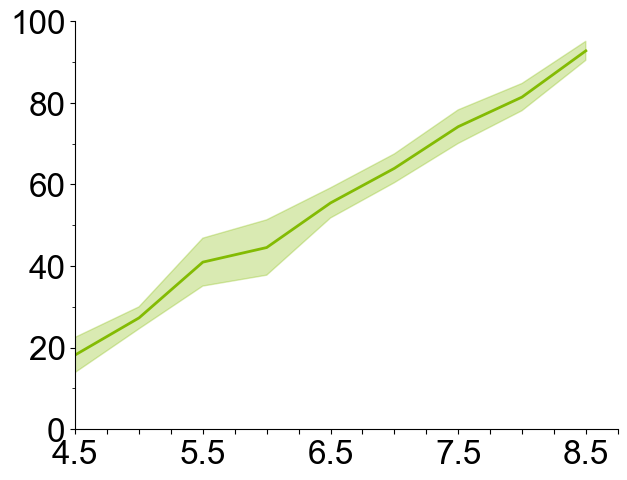

In [95]:
#Plot the average network density data in ndBins as a line with the error bars as a ribbon around the line
fig, ax = plt.subplots(figsize=(7, 5.3))
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower
plt.rcParams['font.size'] = 24
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
#ax.set_xlabel("Time (hpf)")
#ax.set_ylabel("Network Density (%)")
ax.set_xlim(4.5,8.5)
ax.set_ylim(0,100)
ax.set_xticks(np.arange(4.5,9,0.25))
ax.set_xticklabels(["4.5","","","","5.5","","","","6.5","","","","7.5","","","","8.5",""])
ax.set_yticks(np.arange(0,100,10),minor=True)
networkavg = ndBins[["1801_NetworkDensity", "2410_NetworkDensity", "2503_NetworkDensity"]].mean(axis=1)
networksem=ndBins[["1801_NetworkDensity","2410_NetworkDensity","2503_NetworkDensity"]].sem(axis=1)
for index,value in enumerate(networksem):
    if value==np.nan:
        value=ndBins["2503_NetworkDensity_SEM"][index]
ax.plot(ndBins["Time (hpf)"],networkavg,color="#83bb03",linewidth=2)
ax.fill_between(ndBins["Time (hpf)"],networkavg-networksem,networkavg+networksem,color="#83bb03",alpha=0.3)
plt.savefig(outputfolder+"1604_NetworkDensity.png",dpi=300,bbox_inches='tight',transparent=True)
plt.savefig(outputfolder+"1604_NetworkDensity.pdf",dpi=300,bbox_inches='tight',transparent=True)
plt.savefig(outputfolder+"1604_NetworkDensity.svg",dpi=300,bbox_inches='tight',transparent=True)
pd.DataFrame([ndBins["Time (hpf)"],networkavg,networksem]).T.to_csv(outputfolder+"1604_NetworkDensity.csv")
plt.show()


This figure was plotted with 3 datasets from different experiments on 1604. Will delete the other cells which have the same functions.Binned data average and graph data is saved in "H:/PHD_data/Imaging_et_analysis/PaperFigures/Figure1/NetworkDensity/". 

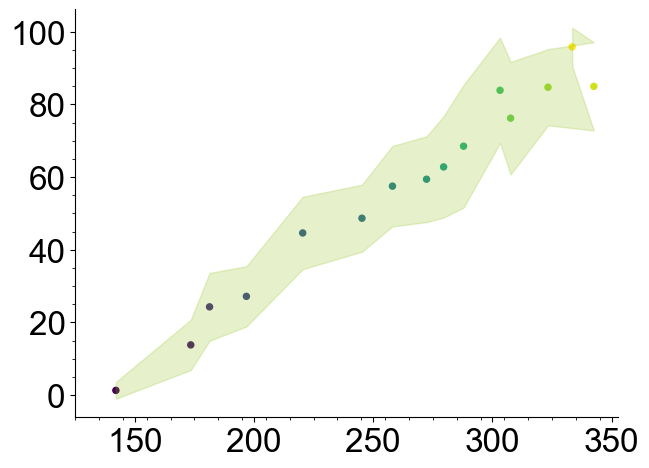

In [18]:
ndivalues=[]
#Network density v intensity corrrelations
for iter in range(len(networkfiles)):
    data=pd.read_csv(networkfiles[iter])
    data=data.drop(columns=data.columns[0])
    data["ndi"]=data['%Area']/data['Mean']
    area_values.append([np.mean(data['%Area'].values),np.std(data['%Area'].values)])
    ndivalues.append([np.mean(data['%Area'].values),np.mean(data['Mean'].values),np.std(data['%Area'].values),np.std(data['Mean'].values)])
#PLOT SETTINGs
fig, ax = plt.subplots(figsize=(7, 5.3))
plt.rcParams['figure.figsize'] = [7, 4]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower
plt.rcParams['font.size'] = 14
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
# plot the %Area and Mean values as a line plot with time as the size and color
plt.scatter([x[1] for x in ndivalues],[x[0] for x in ndivalues],s=19,c=[(t*20/60+4)*10 for t in range(len(ndivalues))],cmap='viridis')
#plt.plot([x[1] for x in ndivalues],[x[0] for x in ndivalues],color='#83bb03')
plt.fill_between([x[1] for x in ndivalues], [x[0]-x[2] for x in ndivalues], [x[0]+x[2] for x in ndivalues],color='#83bb03', alpha=0.2)
# add x and y axis labels
#plt.xlabel('Keratin Filament Intensity (A.U.)')
#plt.ylabel('Keratin Network Density')

ax.set_xticks(np.arange(125,350,10),minor=True)
#ax.set_xticklabels(["4.5","","","","5.5","","","","6.5","","","","7.5","","","","8.5",""])

ax.set_yticks(np.arange(0,100,5),minor=True)
plt.savefig(saveFolder+"KeratinNetworkDensity.svg",format='svg',dpi=300,transparent=True,bbox_inches='tight')
plt.savefig(saveFolder+"KeratinNetworkDensity.png",format='png',dpi=300,bbox_inches='tight')
plt.savefig(saveFolder+"KeratinNetworkDensity.pdf",format='pdf',dpi=300,bbox_inches='tight')
# display the plot
plt.show()

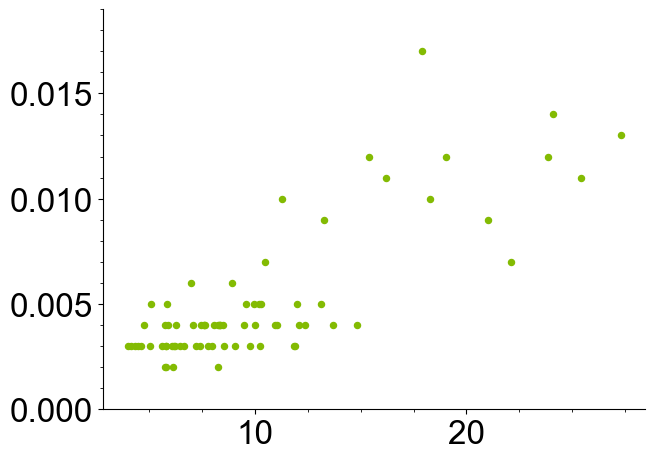

Fit parameters: a=0.0004838302106881209 b=0.00016670729709085492


In [5]:
#plot thejunctional intensity data in junctionalIntensityData as a line plot with error bars as a ribbon around the line
folder="H:/PHD_data/Imaging_et_analysis/NikSD/2023/01_Jan/17012023_K4K8MOYSL/TimeSrs003/Pos001/JunctionalKeratin/Results/"
junctionalIntensityFiles=glob(folder+"*.csv")
apicalpd=pd.read_csv(junctionalIntensityFiles[0])
junctionalpd=pd.read_csv(junctionalIntensityFiles[2])
junctionalIntensityData=pd.DataFrame()
junctionalIntensityData["Apical Intensity"]=apicalpd["Mean"]
junctionalIntensityData["Junctional Intensity"]=junctionalpd["Mean"]
fig, ax = plt.subplots(figsize=(7, 5.3))
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower
plt.rcParams['font.size'] = 24
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
plt.scatter(junctionalIntensityData["Apical Intensity"],junctionalIntensityData["Junctional Intensity"],s=19,color="#83bb03")
#fit using scipy optimize 
from scipy.optimize import curve_fit
def func(x, a, b):
    return a*x + b
popt, pcov = curve_fit(func, junctionalIntensityData["Apical Intensity"], junctionalIntensityData["Junctional Intensity"])
junctionalIntensityData_sorted = junctionalIntensityData.sort_values(by="Apical Intensity")
#plt.plot(junctionalIntensityData_sorted["Apical Intensity"],func(junctionalIntensityData_sorted["Apical Intensity"], *popt),color="black",alpha=0.3)
plt.xticks(np.arange(5,30,2.5),minor=True)
plt.yticks(np.arange(0,0.02,0.001),minor=True)
#plt.xlabel("Apical Intensity (A.U.)")
#plt.ylabel("Junctional Intensity (A.U.)")
plt.savefig(folder+"JunctionalIntensityFitted.png",dpi=300,bbox_inches='tight',transparent=True)
plt.savefig(folder+"JunctionalIntensityFitted.pdf",dpi=300,bbox_inches='tight',transparent=True)
plt.savefig(folder+"JunctionalIntensityFitted.svg",dpi=300,bbox_inches='tight',transparent=True)
plt.show()
#print fit parameters
print("Fit parameters: a="+str(popt[0])+" b="+str(popt[1]))

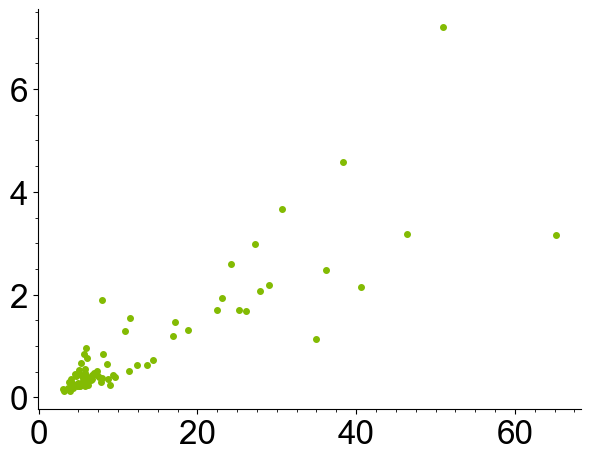

In [11]:
#junctinal v apical intensity replot
from scipy.optimize import curve_fit
folder1="H:/PHD_data/Imaging_et_analysis/NikSD/2023/03_Mar/25032023_EVPLMONetwork/20230325_174106_783/JunctionalPoolAnalysis/"
folder2="H:/PHD_data/Imaging_et_analysis/NikSD/2023/03_Mar/21032023/20230321_165128_314/JunctionalPool/"
folder3="H:/PHD_data/Imaging_et_analysis/NikSD/2023/02_Feb/08022023_K4K8MOYSL/20230208_174204_295/JunctionalPoolAnalysis/"
folder4="H:/PHD_data/Imaging_et_analysis/NikSD/2023/03_Mar/25032023_EVPLMONetwork/20230325_174106_783/JunctionalPoolAnalysis2/"
folder5="H:/PHD_data/Imaging_et_analysis/NikSD/2023/03_Mar/21032023/20230321_170413_923/TimeSrs0000/Pos0000/JunctionalPool/"
folders=[folder1,folder2,folder3,folder4,folder5]
junctionalpd=pd.DataFrame(columns=["25032023_Junction","08022023_Junction","21032023_Junction","25032023_2_Junction","21032023_2_Junction"])
for folder in folders:
    for file in glob(folder+"*Junction*.csv"):
        data=pd.read_csv(file)
        if folder==folder1:
            junctionalpd["25032023_Junction"]=data["Mean"]
        elif folder==folder2:
            junctionalpd["21032023_Junction"]=data["Mean"]
        elif folder==folder3:
            junctionalpd["08022023_Junction"]=data["Mean"]
        elif folder==folder4:
            junctionalpd["25032023_2_Junction"]=data["Mean"]
        elif folder==folder5:
            junctionalpd["21032023_2_Junction"]=data["Mean"]
apicalpd=pd.DataFrame(columns=["25032023_Apical","08022023_Apical","21032023_Apical","25032023_2_Apical","21032023_2_Apical"])
for folder in folders:
    for file in glob(folder+"*Full*.csv"):
        data=pd.read_csv(file)
        if folder==folder1:
            apicalpd["25032023_Apical"]=data["Mean"]
        elif folder==folder2:
            apicalpd["21032023_Apical"]=data["Mean"]
        elif folder==folder3:
            apicalpd["08022023_Apical"]=data["Mean"]
        elif folder==folder4:
            apicalpd["25032023_2_Apical"]=data["Mean"]
        elif folder==folder5:
            apicalpd["21032023_2_Apical"]=data["Mean"]
# # Concatenate data from all columns
# xdata = np.concatenate([apicalpd[col].values for col in apicalpd.columns])
# ydata = np.concatenate([junctionalpd[col].values for col in junctionalpd.columns])
# # Create a DataFrame and drop NaN values
# data_df = pd.DataFrame({'x': xdata, 'y': ydata}).dropna()
# xdata_filtered = np.log(data_df['x'].values)
# ydata_filtered = data_df['y'].values
# def func(x, a, b):
#     return a*x + b
# popt, pcov = curve_fit(func, xdata_filtered, ydata_filtered)
# # Calculate residuals and standard deviation
# residuals = ydata_filtered - func(xdata_filtered, *popt)
# std_dev = np.std(residuals,axis=0)

fig, ax = plt.subplots(figsize=(7, 5.3))
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower
plt.rcParams['font.size'] = 24
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
plt.xticks(np.arange(5,70,2.5),minor=True)
plt.yticks(np.arange(0,9,0.5),minor=True)
plt.scatter(apicalpd["25032023_Apical"],junctionalpd["25032023_Junction"],s=16,color="#83bb03")
#plt.scatter(np.log(apicalpd["08022023_Apical"]),junctionalpd["08022023_Junction"],s=19,color="#bb0383")
plt.scatter(apicalpd["21032023_Apical"],junctionalpd["21032023_Junction"],s=16,color="#83bb03")#"#0383bb")
plt.scatter(apicalpd["25032023_2_Apical"],junctionalpd["25032023_2_Junction"],s=16,color="#83bb03")#"#bb0383")
plt.scatter(apicalpd["21032023_2_Apical"],junctionalpd["21032023_2_Junction"],s=16,color="#83bb03")#"#bb8303")
save_folder="H:/PHD_data/Imaging_et_analysis/PaperFigures/Figure1/H_JunctionalKeratin/"
plt.savefig(save_folder+"JunctionalKeratinIntensity.png",dpi=300,bbox_inches='tight',transparent=True)
plt.savefig(save_folder+"JunctionalKeratinIntensity.pdf",dpi=300,bbox_inches='tight',transparent=True)
plt.savefig(save_folder+"JunctionalKeratinIntensity.svg",dpi=300,bbox_inches='tight',transparent=True)
plt.show()
apicalpd.to_csv(save_folder+"ApicalKeratinIntensity.csv")
junctionalpd.to_csv(save_folder+"JunctionalKeratinIntensity.csv")
# Plot the fitted line
# x_fit = np.linspace(min(xdata), max(xdata), 100)
# y_fit = func(x_fit, *popt)
#plt.plot(x_fit, y_fit, color="#83bb03")

# Plot the shaded region for spread
#plt.fill_between(x_fit, y_fit - residuals, y_fit + residuals, color="#83bb03", alpha=0.3)

#plt.xticks(np.arange(100,230,5),minor=True)

# plt.yticks(np.arange(0,0.02,0.001),minor=True)


In [37]:
pd.cut(xdata_filtered, bins=5)

[(136.233, 162.089], (162.089, 187.816], (162.089, 187.816], (162.089, 187.816], (136.233, 162.089], ..., (162.089, 187.816], (162.089, 187.816], (136.233, 162.089], (162.089, 187.816], (162.089, 187.816]]
Length: 59
Categories (5, interval[float64, right]): [(136.233, 162.089] < (162.089, 187.816] < (187.816, 213.542] < (213.542, 239.269] < (239.269, 264.996]]

In [6]:
#retrail of the 3d plot of network intensity density and area
ndabinnedcsv="H:/PHD_data/Imaging_et_analysis/PaperFigures/Figure1/NetworkDensity/NetworkDensityData_3_16042024.csv"
ndabinendpd=pd.read_csv(ndabinnedcsv)

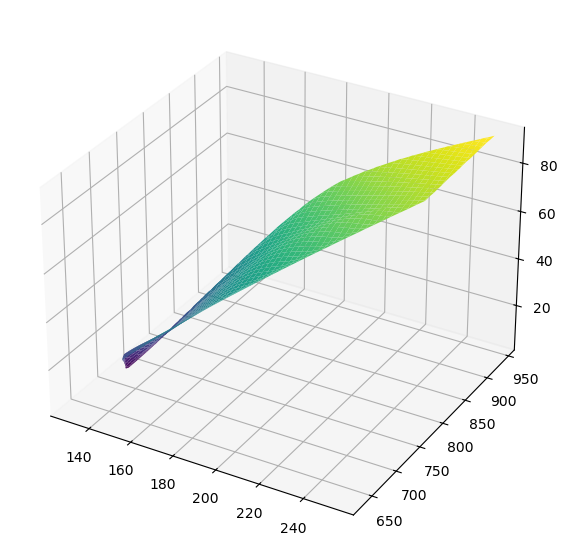

In [20]:
ndabinendpd['mean_intensity']=ndabinendpd[['1801_Intensity','2410_Intensity','2503_Intensity']].mean(axis=1)
ndabinendpd['mean_nd']=ndabinendpd[['1801_NetworkDensity','2410_NetworkDensity','2503_NetworkDensity']].mean(axis=1)
ndabinendpd['mean_area']=ndabinendpd[['1801_Area','2410_Area','2503_Area']].mean(axis=1)

#triangulate the data
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
# Your existing data
x = ndabinendpd['mean_intensity'][:-2]
y = ndabinendpd['mean_area'][:-2]
z = ndabinendpd['mean_nd'][:-2]

# Create a grid to interpolate onto
xi = np.linspace(x.min(), x.max(), 500)
yi = np.linspace(y.min(), y.max(), 500)
xi, yi = np.meshgrid(xi, yi)

# Interpolate z values on the grid
zi = griddata((x, y), z, (xi, yi), method='cubic')

# Plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xi, yi, zi, cmap='viridis', edgecolor='none')


In [12]:
ndabinendpd[:-2]

,Unnamed: 0,Time (hpf),2503_NetworkDensity,2503_NetworkDensity_SEM,2503_Area,2503_Area_SEM,2503_Intensity,2503_Intensity_SEM,1801_NetworkDensity,1801_NetworkDensity_SEM,...,1801_Intensity_SEM,2410_NetworkDensity,2410_NetworkDensity_SEM,2410_Area,2410_Area_SEM,2410_Intensity,2410_Intensity_SEM,mean_intensity,mean_nd,mean_area
0,0,4.0,1.299400,NaN,710.232200,NaN,142.046800,NaN,NaN,NaN,...,NaN,3.129545,NaN,728.480636,NaN,118.447068,NaN,130.246934,2.214473,719.356418
1,1,4.5,19.052359,5.234859,614.920882,11.007056,177.404750,3.940250,25.224609,12.947446,...,2.597148,10.380744,NaN,745.344884,NaN,120.925349,NaN,139.711082,18.219237,683.457093
2,2,5.0,27.175667,NaN,599.891500,NaN,196.797250,NaN,22.692107,1.324844,...,0.369253,32.030711,NaN,667.647053,NaN,133.593237,NaN,149.998838,27.299495,638.378283
3,3,5.5,46.653931,2.030069,556.570391,7.028197,232.840132,12.422604,29.224897,1.883028,...,0.490187,47.002107,NaN,647.393429,NaN,142.504357,NaN,165.516314,40.960312,635.119504
4,4,6.0,57.509538,NaN,610.210538,NaN,258.050923,NaN,41.460099,4.961897,...,1.634241,34.637755,NaN,678.827592,NaN,141.241633,NaN,174.691609,44.535798,686.241974
5,5,6.5,61.107577,1.694302,696.439106,19.894406,275.937949,3.575124,56.759181,2.071345,...,0.547578,48.517229,NaN,701.861667,NaN,149.395708,NaN,184.817610,55.461329,768.560426
6,6,7.0,68.503791,NaN,730.986349,NaN,287.882907,NaN,66.307360,1.764265,...,0.528485,56.990100,NaN,762.862420,NaN,152.730660,NaN,190.821196,63.933750,815.479845
7,7,7.5,80.050502,3.835139,766.451163,23.888625,305.391145,2.210734,76.152058,2.596033,...,0.308334,66.224104,NaN,807.180250,NaN,156.993521,NaN,199.154398,74.142221,860.767058
8,8,8.0,84.732424,NaN,842.904818,NaN,323.304455,NaN,NaN,NaN,...,NaN,78.059596,NaN,831.362894,NaN,164.984234,NaN,244.144344,81.396010,837.133856
9,9,8.5,90.404935,5.436435,967.395502,41.044461,337.975194,4.540639,NaN,NaN,...,NaN,95.063717,NaN,915.665435,NaN,168.801891,NaN,253.388543,92.734326,941.530469


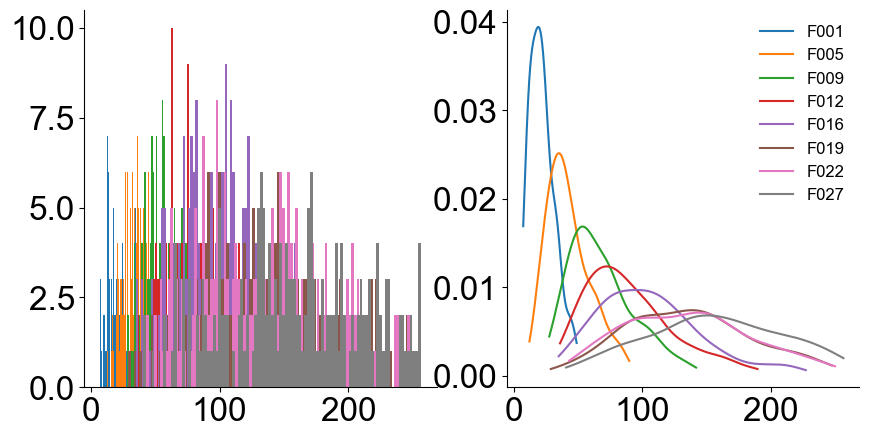

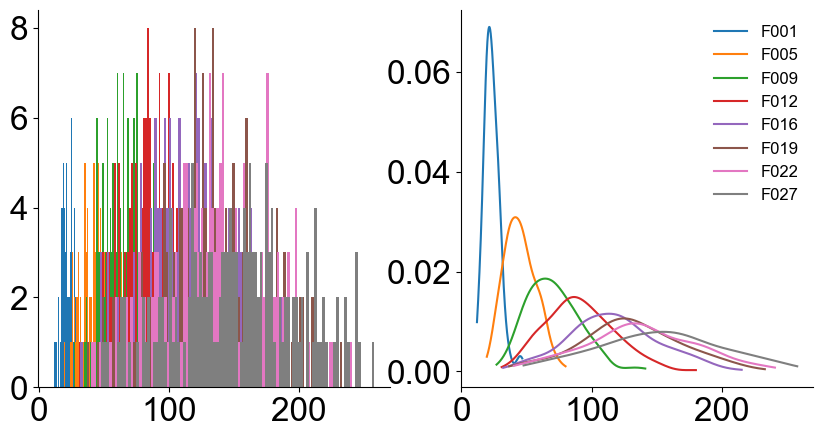

In [19]:
from scipy.stats import gaussian_kde
def plotthehist(folder):
    files=glob(folder+"*.csv")
    fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
    for file in files:
        data=pd.read_csv(file)
        label=file[file.find("_F")+1:file.find("_F")+5]
        plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower
        plt.rcParams['font.size'] = 24
        plt.rcParams['savefig.dpi'] = 300
        plt.rcParams['font.family'] = 'sans-serif'
        plt.rcParams['font.sans-serif'] = 'Arial'
        ax1.spines['right'].set_color('none')
        ax1.spines['top'].set_color('none')
        ax2.spines['right'].set_color('none')
        ax2.spines['top'].set_color('none')
        plot=ax1.hist(data["Mean"],bins=100)
        kde=gaussian_kde(data["Mean"])
        x_vals=np.linspace(min(data["Mean"]),max(data["Mean"]),1000)
        kde_vals=kde(x_vals)
        ax2.plot(x_vals,kde_vals,label=label)
        ax2.legend(frameon=False,loc="best",fontsize=12)
        plt.savefig(folder+"KeratinIntensityHist.png",dpi=300,bbox_inches='tight',transparent=True)
        plt.savefig(folder+"KeratinIntensityHist.pdf",dpi=300,bbox_inches='tight',transparent=True)
        plt.savefig(folder+"KeratinIntensityHist.svg",dpi=300,bbox_inches='tight',transparent=True)
    plt.show()

folder1="H:/PHD_data/Imaging_et_analysis/Sp8Imaging/2023/01_Jan/19012023_K4K8onecell_G/Pos001/KeratinIntensitycellDist/"
folder2="H:/PHD_data/Imaging_et_analysis/Sp8Imaging/2023/01_Jan/19012023_K4K8onecell_G/Pos002/KeratinIntensitycellDist/"
plotthehist(folder1)
plotthehist(folder2)

In [4]:
#QPCR data plotting and analysis 
cqdatafile="H:/PHD_data/Imaging_et_analysis/PaperFigures/Figure1/Sup/QpCR/Cqresults.xlsx"
cqdata=pd.read_excel(cqdatafile)
cqdata

,Sampleid,1,2,3,4,Avg ddcq,Unnamed: 6,Unnamed: 7
0,K8 1k,6.991887,3.527881,3.492354,5.244302,4.814106,0.721509,0.035548
1,K8 sph,-3.053235,2.031405,1.999770,5.495389,1.618332,1.524205,0.325712
2,K8 sh,-4.525871,-4.613318,-3.961743,-5.231413,-4.583086,0.225081,23.968807
3,K8 bud,-5.215579,-4.358182,-5.696946,-4.669629,-4.985084,0.256465,31.670854
4,K18 1k,6.841673,3.293707,3.172549,6.914059,5.055497,0.911526,0.030071
5,K18 sph,-2.637569,1.357002,1.449666,5.467700,1.409200,1.432919,0.376520
6,K18 sh,-4.543955,-4.790456,-4.202633,-5.076369,-4.653353,0.160635,25.165116
7,K18 bud,-5.112361,-4.493198,-6.933855,-5.183962,-5.430844,0.454189,43.136700
8,K4 1k,10.343501,5.243437,5.033742,10.278801,7.724870,1.293722,0.004727
9,K4 sph,-1.362278,4.655382,4.087384,9.544683,4.231293,1.931979,0.053242


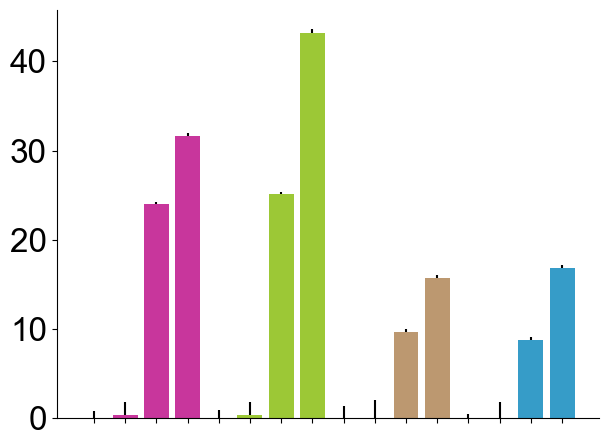

In [16]:
fig,ax=plt.subplots(figsize=(7,5.3))
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower
plt.rcParams['font.size'] = 24
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
ax.set_xticks(np.arange(0,len(cqdata.iloc[:,0]),1))
ax.set_xticklabels([""]*len(cqdata.iloc[:,0]))
colorpallette=["#bb0383","#bb0383","#bb0383","#bb0383","#83bb03","#83bb03","#83bb03","#83bb03","#AB7E4C","#AB7E4C","#AB7E4C","#AB7E4C","#0383bb","#0383bb","#0383bb","#0383bb"]
plt.bar(cqdata.iloc[:,0],cqdata.iloc[:,-1],yerr=[np.zeros(len(cqdata.iloc[:,-2])),cqdata.iloc[:,-2]],color=colorpallette,alpha=0.8)
plt.savefig("H:/PHD_data/Imaging_et_analysis/PaperFigures/Figure1/Sup/QpCR/QpCR.png",dpi=300,bbox_inches='tight',transparent=True)
plt.savefig("H:/PHD_data/Imaging_et_analysis/PaperFigures/Figure1/Sup/QpCR/QpCR.pdf",dpi=300,bbox_inches='tight',transparent=True)
plt.savefig("H:/PHD_data/Imaging_et_analysis/PaperFigures/Figure1/Sup/QpCR/QpCR.svg",dpi=300,bbox_inches='tight',transparent=True)
plt.show()

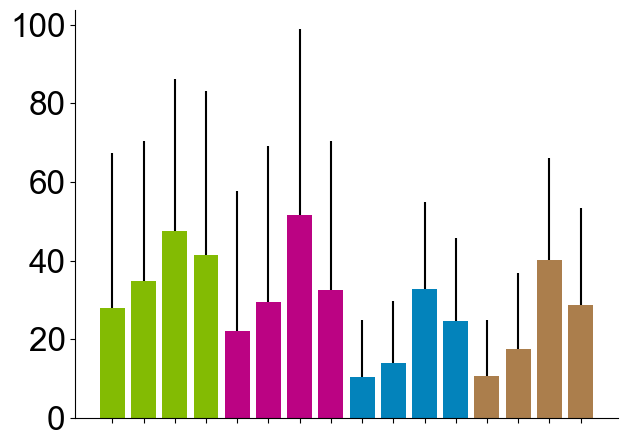

In [11]:
myptcq="H:/PHD_data/Imaging_et_analysis/PaperFigures/Figure1/Sup/QpCR/Myptcq.xlsx"
myptcqdata=pd.read_excel(myptcq)
fig,ax=plt.subplots(figsize=(7,5.3))
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower
plt.rcParams['font.size'] = 24
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
ax.set_xticks(np.arange(0,len(myptcqdata.iloc[:,0]),1))
ax.set_xticklabels([""]*len(myptcqdata.iloc[:,0]))
plt.bar(myptcqdata.iloc[:,0],myptcqdata.iloc[:,3],yerr=[np.zeros(len(myptcqdata.iloc[:,4])),myptcqdata.iloc[:,4]],color=colorpallette)
plt.savefig("H:/PHD_data/Imaging_et_analysis/PaperFigures/Figure1/Sup/QpCR/Myptcq.png",dpi=300,bbox_inches='tight',transparent=True)
plt.savefig("H:/PHD_data/Imaging_et_analysis/PaperFigures/Figure1/Sup/QpCR/Myptcq.pdf",dpi=300,bbox_inches='tight',transparent=True)
plt.savefig("H:/PHD_data/Imaging_et_analysis/PaperFigures/Figure1/Sup/QpCR/Myptcq.svg",dpi=300,bbox_inches='tight',transparent=True)
plt.show()

In [7]:
myptcqdata

,Sampleid,1,2,Avg,std
0,K8 sh wt,55.055540,35.474492,45.265016,13.845892
1,K8 sh mypt,41.351802,30.558989,35.955396,7.631671
2,K8 bud wt,33.118853,35.800228,34.459540,1.896018
3,K8 bud mypt,40.823415,42.747926,41.785670,1.360835
4,K18 sh wt,45.910884,38.523090,42.216987,5.223959
5,K18 sh mypt,54.070195,35.646011,44.858103,13.027865
6,K18 bud wt,43.463192,44.732564,44.097878,0.897582
7,K18 bud mypt,42.191890,41.439625,41.815758,0.531932
8,K4 sh wt,16.810660,16.397306,16.603983,0.292285
9,K4 sh mypt,13.871732,19.994996,16.933364,4.329802
